# 3. Tracking and Event Data
In this Notebook we will be working with player tracking data, and create shot maps with both tracking and event data provided by Metrica Sports (https://github.com/metrica-sports/sample-data)

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import Metrica_IO as mio
import Metrica_VIZ as mviz

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
#get the url's from the Metrica Sports github page, with sample game 1 and 2
game1_events = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawEventsData.csv"
game1_away_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv"
game1_home_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv"

game2_events = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawEventsData.csv"
game2_away_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv"
game2_home_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv"

In [3]:
#load data
df_events2 = pd.read_csv(game2_events)
df_track_away2 = pd.read_csv(game2_away_tracking)
df_track_home2 = pd.read_csv(game2_home_tracking)

/home/rcr1/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rcr1/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Explore our event data

In [4]:
#initial look
df_events2.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [5]:
#see which events has occured in the match
df_events2["Type"].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

Change the coordinate system of the Metrica start- and end locations from ranging between 0 and 1 to pitch length of 106 m. and pitch width of 53 m. with origin in the middle.

In [6]:
df_events2 = mio.to_metric_coordinates(df_events2)

### Assign events to home- and away team.

In [7]:
home_events = df_events2[df_events2["Team"] == "Home"]
away_events = df_events2[df_events2["Team"] == "Away"]

In [8]:
home_events["Type"].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [9]:
away_events["Type"].value_counts()

PASS              421
CHALLENGE         151
RECOVERY          113
BALL LOST         113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64

### Looking into the shots data

In [10]:
#create a dataframe of all shots
shots = df_events2[df_events2["Type"] == "SHOT"]

In [11]:
#divide the shots in home- and away shots
home_shots = home_events[home_events.Type == "SHOT"]
away_shots = away_events[away_events.Type == "SHOT"]

In [12]:
#look into the different subtypes (header, free kicks etc.)
print(home_shots["Subtype"].value_counts())
print(away_shots["Subtype"].value_counts())

ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64
OFF TARGET-OUT         3
ON TARGET-SAVED        2
BLOCKED                2
ON TARGET-GOAL         2
HEAD-OFF TARGET-OUT    1
OFF TARGET-HEAD-OUT    1
Name: Subtype, dtype: int64


### Extract the goals

In [13]:
#extract home and away goals (using pandas str.contains())
home_goals = home_shots[home_shots["Subtype"].str.contains("-GOAL")].copy()
away_goals = away_shots[away_shots["Subtype"].str.contains("-GOAL")].copy()

In [14]:
#get minute timings
home_goals["Minute"] = home_goals["Start Time [s]"]/60

In [17]:
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04,8.134667
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72,80.684667


We will now plot the first goal and the passing move leading up to the goal. The goal has index `198` and the passing move starts at index `190`

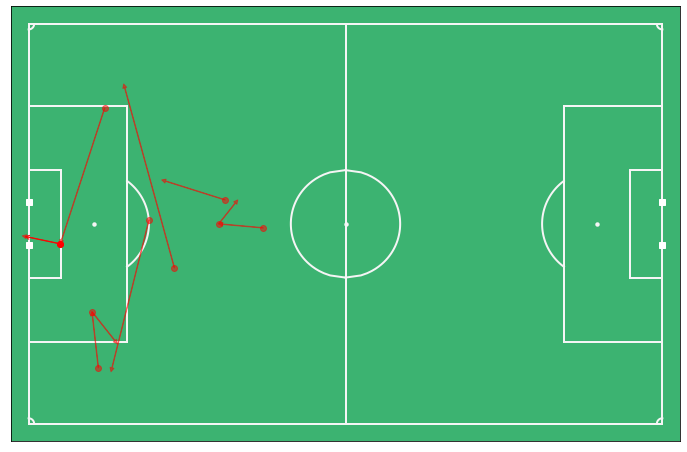

In [21]:
fig, ax = mviz.plot_pitch()
ax.plot(df_events2.loc[198]["Start X"], df_events2.loc[198]["Start Y"], "ro")
ax.annotate("", xy = df_events2.loc[198][["End X", "End Y"]], xytext = df_events2.loc[198][["Start X", "Start Y"]], 
            alpha = 0, arrowprops = dict(arrowstyle = "->", color = "r"))

#plot passing move leading to the goal
mviz.plot_events(df_events2.loc[190:198], indicators = ["Marker", "Arrow"], figax = (fig, ax))
plt.show()